**Домашнее задание по pandas. Березовский Андрей, Б06-903**

In [47]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

**Задание №1**

In [48]:
df = pd.read_csv('flight_delays.csv')
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [49]:
rows = df.shape[0] 

Количество задержек: 19.0 %
Количество вылетов без задержки: 81.0 %


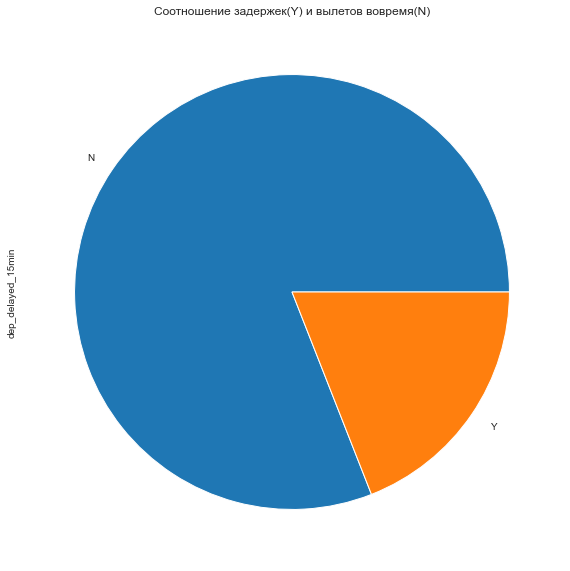

In [50]:
print('Количество задержек:', round(df['dep_delayed_15min'].value_counts(normalize=True)[1], 2)*100,'%')
print('Количество вылетов без задержки:', round(df['dep_delayed_15min'].value_counts(normalize=True)[0], 2)*100,'%') # Более наглядный результат
df['dep_delayed_15min'].value_counts(normalize=True).plot(kind='pie', figsize=(10,10))
plt.title('Соотношение задержек(Y) и вылетов вовремя(N)');

In [51]:
df[(df['dep_delayed_15min'] == 'Y')]['Distance'].value_counts(ascending=True).to_frame()

,Distance
769,1
555,1
2254,1
112,1
2688,1
...,...
370,87
528,88
612,89
403,90


In [52]:
df1 = df[(df['dep_delayed_15min'] == 'Y')]['Distance'].value_counts(ascending=True).to_frame()
new_df = pd.DataFrame({'Distance' : df1.index, 'Number' : df1['Distance'].values})

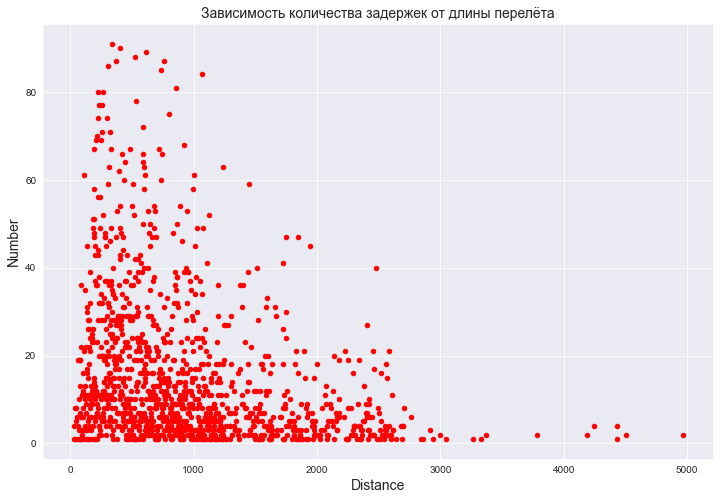

In [53]:
new_df.plot.scatter(x = 'Distance', y = 'Number', c ='red', figsize = (12, 8));
plt.title('Зависимость количества задержек от длины перелёта', fontsize = 14);
plt.xlabel('Distance', fontsize = 14)
plt.ylabel('Number', fontsize = 14)
plt.show()

**Заметно, что на очень больших и на очень малых дистанциях задержек крайне мало. Предположу, что для рейсов на большие дистанции дается большой запас времени на обслуживание самолета. А для рейсов на малые дистанции обслуживание требуется нечасто (только дозаправка)**

In [54]:
df2 = df[(df['dep_delayed_15min'] == 'Y')][['Origin', 'Dest']].value_counts(ascending=False).to_frame()
df2.head(5)

,,0
Origin,Dest,
ATL,LGA,50
ORD,LGA,45
LAS,LAX,40
ATL,EWR,39
LAX,LAS,37


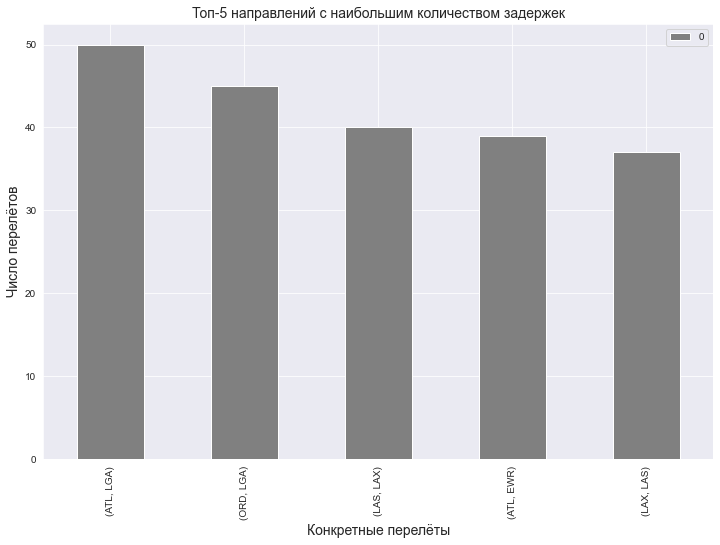

In [55]:
df2.head(5).plot.bar(figsize = (12, 8), color = 'gray', label = 'количество перелётов')
plt.title('Топ-5 направлений с наибольшим количеством задержек', fontsize = 14);
plt.xlabel('Конкретные перелёты', fontsize = 14)
plt.ylabel('Число перелётов', fontsize = 14)
plt.show()

**Наибольшее число задержек на направлениях Атланта - Нью-Йорк и Чикаго - Нью-Йорк (скорее всего самые загруженные аэропорты в США)**

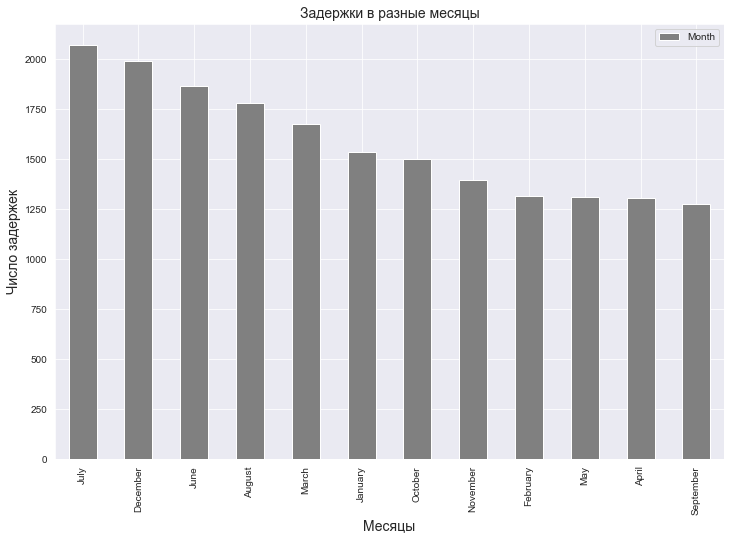

In [56]:
df3 = df[(df['dep_delayed_15min'] == 'Y')].replace(
    {'Month' : {'c-1':'January', 'c-2':'February', 'c-3':'March', 'c-4':'April', 'c-5':'May', 'c-6':'June',
                'c-7':'July', 'c-8':'August', 'c-9':'September', 'c-10':'October','c-11':'November', 'c-12':'December'}})
                    
df3_new = df3['Month'].value_counts(ascending=False).to_frame()
df3_new.plot.bar(figsize = (12, 8), color = 'gray')
plt.title('Задержки в разные месяцы', fontsize = 14);
plt.xlabel('Месяцы', fontsize = 14)
plt.ylabel('Число задержек', fontsize = 14)
plt.show()

**Предположу, что загруженность в декабре происходит на фоне католического рождества, а в июле - дня независимости и отпусков (плюс каникулы у школьников и студентов)**

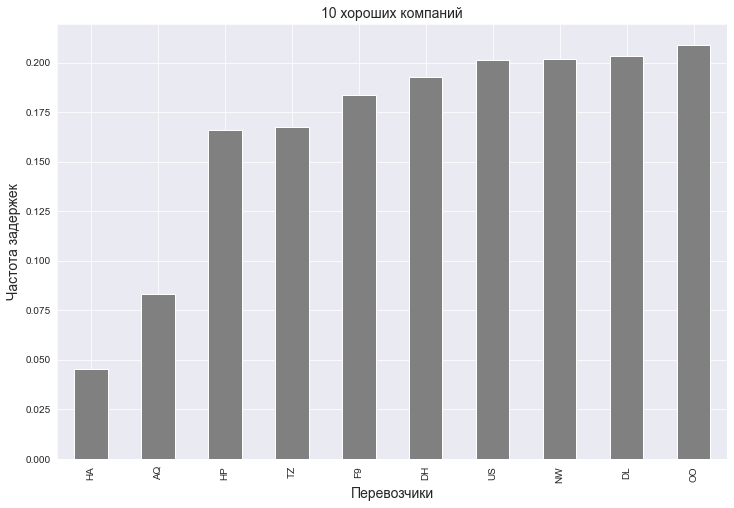

In [57]:
No_delayed = df[(df['dep_delayed_15min'] == 'N')]['UniqueCarrier'].value_counts(ascending=False)
delayed = df[(df['dep_delayed_15min'] == 'Y')]['UniqueCarrier'].value_counts(ascending=False)
ratio = delayed/No_delayed
df4 = ratio.sort_values(ascending=True).iloc[0:10]
df4.plot.bar(figsize = (12, 8), color = 'gray')
plt.title('10 хороших компаний', fontsize = 14);
plt.xlabel('Перевозчики', fontsize = 14)
plt.ylabel('Частота задержек', fontsize = 14)
plt.show()

**Очевидным лидером по "пунктуальности" являются Hawaian Airlines**

In [58]:
print(df['UniqueCarrier'].value_counts(ascending=False))

WN    15082
AA     9418
DL     8128
MQ     7443
OO     7390
UA     6876
US     6482
NW     6403
XE     5901
OH     4594
CO     4334
EV     3930
FL     3039
AS     2222
YV     2128
B6     1838
HP     1378
F9     1006
DH      966
HA      762
TZ      446
AQ      234
Name: UniqueCarrier, dtype: int64


In [62]:
No_delayed_A_500 = No_delayed_A[No_delayed_A > 500]
delayed_A_500 = delayed_A
ratio_A_500 = delayed_A_500/No_delayed_A_500
df5_500 = ratio_A_500.sort_values(ascending=False).iloc[0:10]

In [63]:
df5_500

ATL    0.347967
ORD    0.346792
MDW    0.335288
EWR    0.324487
PHL    0.315704
HOU    0.313015
MIA    0.297414
JFK    0.285223
LAS    0.277580
DTW    0.274282
Name: Origin, dtype: float64

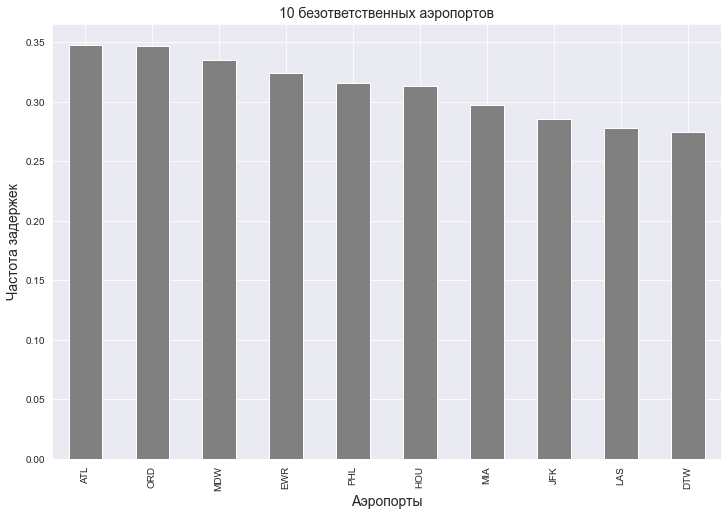

In [65]:
df5_500.plot.bar(figsize = (12, 8), color = 'gray')
plt.title('10 безответственных аэропортов', fontsize = 14);
plt.xlabel('Аэропорты', fontsize = 14)
plt.ylabel('Частота задержек', fontsize = 14)
plt.show()

**На первом месте аэропорт Атланты, в спину дышит один аэропорт Чикаго, бронзу держит второй аэропорт Чикаго :)**